In [52]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ridge import RidgeRegression

In [53]:

#1- Data loading
ds = pd.read_csv('olympics_100m.csv', sep=',')

#Splitting traing/test
training = ds[0:len(ds)-2]
testing=ds[-2:]

X = training.loc[:,'Year'].values
y = training.loc[:, 'Time'].values
X = X.reshape(len(training),1)



#Split in training + validation and test  
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

X_train_val = PolynomialFeatures(1).fit_transform(X_train_val)
X_test = PolynomialFeatures(1).fit_transform(X_test)    

#check the result obtained
#print(X_train_val.shape)
#print(X_test.shape)

In [54]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lambda_values = np.array([((10 ** i)) for i in range(-10,4)])

mse_values = []
l_values = []


for i, (train_index, test_index) in enumerate(kf.split(X)):

    mse_minimum = int(1e10)

    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    for l in lambda_values:
        model = RidgeRegression(l)
        model.train(X_train,y_train)
        y_hat = model.predict(X_val)
        mse = model.MSE(y_hat,y_val)
        if(mse < mse_minimum):
            mse_minimum = mse
            lambda_best = l
        print(f'Fold {i} - Lambda {l} - MSE {mse}')
    
    mse_values.append(mse_minimum)
    l_values.append(lambda_best)


print(f'MSE values: {mse_values}')
print(f'Lambda values: {l_values}')

mse_values = np.array(mse_values)
average_mse = np.mean(mse_values)
print(f'Average MSE: {average_mse}')

index = np.argmin(np.abs(mse_values - average_mse))


lambda_best = l_values[index]
print(f'Best lambda: {lambda_best}')


# # Prediction with our model
# y_hat = model.predict(X_val)

# # Accuracy esteem
# acc = np.sum(y_hat == y_val)/y_val.size * 100
# print(f'Accuracy: {acc}')

# # Training and prediction with scikit perceptron model
# example = PerceptronSci(alpha=alpha)
# example.fit(X_train,y_train)
# y_ex = example.predict(X_val)

# # Check the results are the same
# equal = y_ex == y_hat
# # print(y_ex)
# # print(y_hat)
# # print(equal)
# print(f'The results are equal to scikit: {not equal[equal==False].size}')

Fold 0 - Lambda 1e-10 - MSE 0.7676736925276515
Fold 0 - Lambda 1e-09 - MSE 0.7676736925276515
Fold 0 - Lambda 1e-08 - MSE 0.7676736925276515
Fold 0 - Lambda 1e-07 - MSE 0.7676736925276515
Fold 0 - Lambda 1e-06 - MSE 0.7676736925276515
Fold 0 - Lambda 1e-05 - MSE 0.7676736925276515
Fold 0 - Lambda 0.0001 - MSE 0.7676736925276515
Fold 0 - Lambda 0.001 - MSE 0.7676736925276515
Fold 0 - Lambda 0.01 - MSE 0.7676736925276515
Fold 0 - Lambda 0.1 - MSE 0.7676736925276515
Fold 0 - Lambda 1.0 - MSE 0.7676736925276515
Fold 0 - Lambda 10.0 - MSE 0.7676736925276515
Fold 0 - Lambda 100.0 - MSE 0.7676736925276515
Fold 0 - Lambda 1000.0 - MSE 0.7676736925276515
Fold 1 - Lambda 1e-10 - MSE 0.3735106765849854
Fold 1 - Lambda 1e-09 - MSE 0.3735106765849854
Fold 1 - Lambda 1e-08 - MSE 0.3735106765849854
Fold 1 - Lambda 1e-07 - MSE 0.3735106765849854
Fold 1 - Lambda 1e-06 - MSE 0.3735106765849854
Fold 1 - Lambda 1e-05 - MSE 0.3735106765849854
Fold 1 - Lambda 0.0001 - MSE 0.3735106765849854
Fold 1 - Lambda 

[ 3.72372956e+01 -1.37384004e-02]
[ 0.        -0.0137384]
MSE: 0.04106237370478089
MSE (scikit): 0.041062373704778846


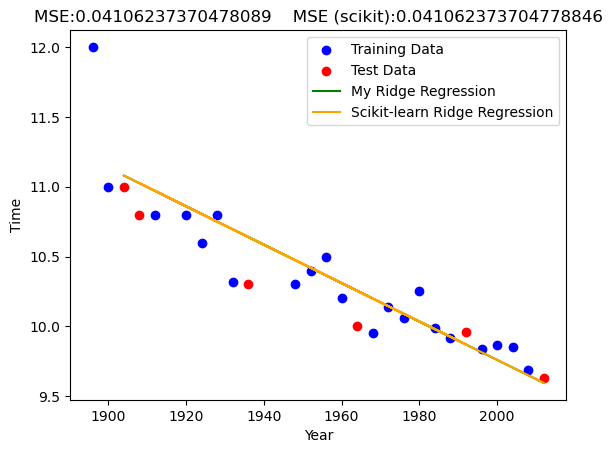

In [55]:
#Comparison with scikit model

model = RidgeRegression(lambda_best)
model.train(X_train_val,y_train_val)
print(model.weights)
y_hat = model.predict(X_test)
model.MSE(y_hat,y_test)



RidgeModel = Ridge(alpha=lambda_best)
RidgeModel.fit(X_train_val,y_train_val)
print(RidgeModel.coef_)
y_hat_sk = RidgeModel.predict(X_test)



print(f'MSE: {model.MSE(y_hat,y_test)}')
print(f'MSE (scikit): {mean_squared_error(y_test,y_hat_sk)}')

# Plotting training data
plt.scatter(X_train_val[:, 1], y_train_val, color='blue', label='Training Data')
# Plotting test data
plt.scatter(X_test[:, 1], y_test, color='red', label='Test Data')

plt.plot(X_test[:, 1], y_hat, label='My Ridge Regression', color='green')
plt.plot(X_test[:,1], y_hat_sk, label='Scikit-learn Ridge Regression', color='orange')

plt.title('MSE:' + str(model.MSE(y_hat,y_test)) + '    MSE (scikit):' + str(mean_squared_error(y_test,y_hat_sk)))
plt.xlabel('Year')
plt.ylabel('Time')
plt.legend()
plt.show()





# plt.scatter(X_test[:, 1], y_test, color='red', label='Test Data')

# # Plotting Ridge regression line
# x_range = np.linspace(min(X_train_val[:, 1]), max(X_train_val[:, 1]), 100).reshape(-1, 1)
# x_range_poly = PolynomialFeatures(1).fit_transform(x_range)
# y_range = model.predict(x_range_poly)
# plt.plot(x_range, y_range, color='green', label='Your Ridge Regression Model')

# # Plotting scikit-learn Ridge regression line
# y_range_sk = RidgeModel.predict(PolynomialFeatures(1).fit_transform(x_range))
# plt.plot(x_range, y_range_sk, color='orange', label='Scikit-learn Ridge Model')

# plt.xlabel('Year')
# plt.ylabel('Time')
# plt.title('MSE:' + str(model.MSE(y_hat,y_test)) + '    MSE (scikit):' + str(mean_squared_error(y_test,y_hat_sk)))

# plt.legend()
# plt.show()

